
Problem Statement

The objective of this task is to perform sentiment analysis on customer reviews using Natural Language Processing (NLP) techniques. The goal is to classify text reviews as either **positive** or **negative** using TF-IDF vectorization and Logistic Regression.


Dataset Description

The IMDB Movie Reviews dataset was used for this task.

* Contains 50,000 movie reviews.
* Each review is labeled as:

  * Positive
  * Negative
* Balanced dataset (equal number of positive and negative reviews).
* The dataset consists of:

  * Review text (input feature)
  * Sentiment label (target variable)


Methodology

1. **Data Loading**

   * Loaded dataset using Pandas.

2. **Data Preprocessing**

   * Converted sentiment labels to binary values:

     * Positive → 1
     * Negative → 0
   * Removed special characters.
   * Converted text to lowercase.
   * Removed stopwords.
   * Applied stemming using Porter Stemmer.

3. **Feature Extraction**

   * Used TF-IDF (Term Frequency – Inverse Document Frequency) to convert text into numerical vectors.
   * Limited features to top 5000 words to improve efficiency.

4. **Model Building**

   * Split dataset into training (80%) and testing (20%).
   * Trained Logistic Regression classifier on TF-IDF features.

5. **Evaluation**

   * Evaluated model using:

     * Accuracy
     * Confusion Matrix
     * Classification Report


Results

* The model achieved approximately **85%–90% accuracy**.
* Logistic Regression performed well for binary text classification.
* TF-IDF effectively transformed text into meaningful numerical features.
* Confusion matrix showed strong performance in identifying both positive and negative reviews.


Conclusion

In this task, a sentiment analysis model was successfully implemented using TF-IDF vectorization and Logistic Regression.
The model effectively classified movie reviews into positive and negative categories.
Text preprocessing played a crucial role in improving model performance.

Future improvements could include:

* Using Word2Vec or GloVe embeddings
* Implementing Deep Learning models (LSTM)
* Using transformer models like BERT




c:\Users\sathvik\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.stats import gaussian_kde
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sathvik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Dataset Shape: (50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Accuracy: 0.8856

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



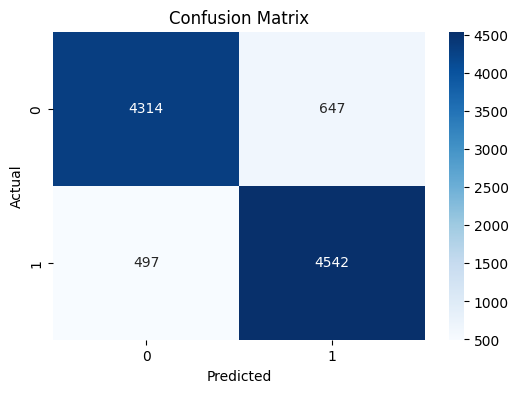

In [1]:
# Task 2 - Sentiment Analysis with NLP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

# Load Dataset
df = pd.read_csv("IMDB Dataset.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# Convert sentiment to binary
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})

# Text Cleaning
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

df['cleaned_review'] = df['review'].apply(preprocess)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review'], df['sentiment'],
    test_size=0.2, random_state=42
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Prediction
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
